In [1]:
# --- Importation des bibliothèques nécessaires ---
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

Répertoire courant : c:\Users\sdebb\medical-ai-diagnostic-system\notebooks


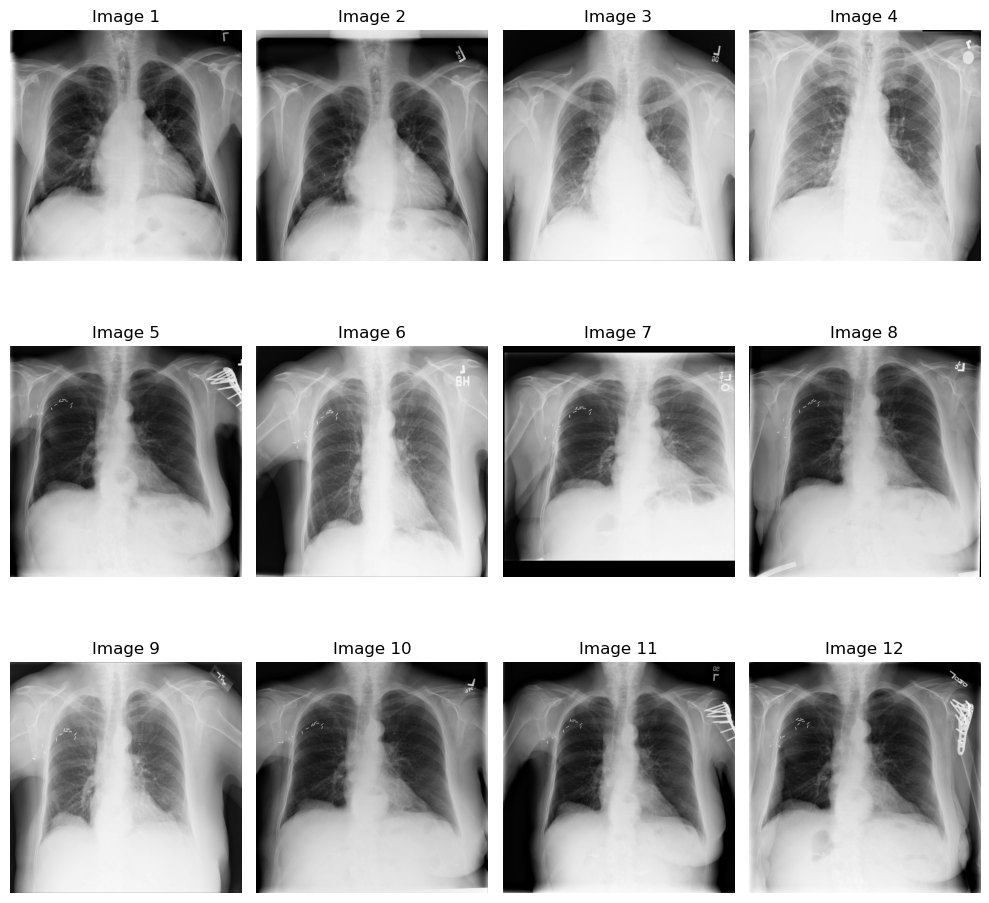

In [15]:


# --- Chemins vers les données ---
RAW_DATA_DIR = "../data/raw/"
CSV_FILE = os.path.join(RAW_DATA_DIR, "Data_Entry_2017.csv")
import os
import matplotlib.pyplot as plt
from PIL import Image
import os
print("Répertoire courant :", os.getcwd())

# --- Dossier contenant les images ---
RAW_DATA_DIR = "../data/raw/"
# --- Liste des fichiers image présents dans le dossier ---
image_files = [f for f in os.listdir(RAW_DATA_DIR) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# --- Limiter le nombre d'images affichées à 12 ---
image_files = image_files[:12]

# --- Création d’une figure 10x10 pour afficher plusieurs images ---
plt.figure(figsize=(10, 10))

# --- Boucle pour afficher chaque image ---
for i, file_name in enumerate(image_files):
    img_path = os.path.join(RAW_DATA_DIR, file_name)
    
    try:
        # Charger l'image et la convertir en niveaux de gris
        img = Image.open(img_path).convert('L')
        
        # Afficher dans une grille 3x4
        plt.subplot(3, 4, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Image {i+1}")
        plt.axis('off')
        
    except Exception as e:
        print(f"Erreur avec l'image {file_name}: {e}")

# --- Ajustement final de la grille et affichage ---
plt.tight_layout()
plt.show()


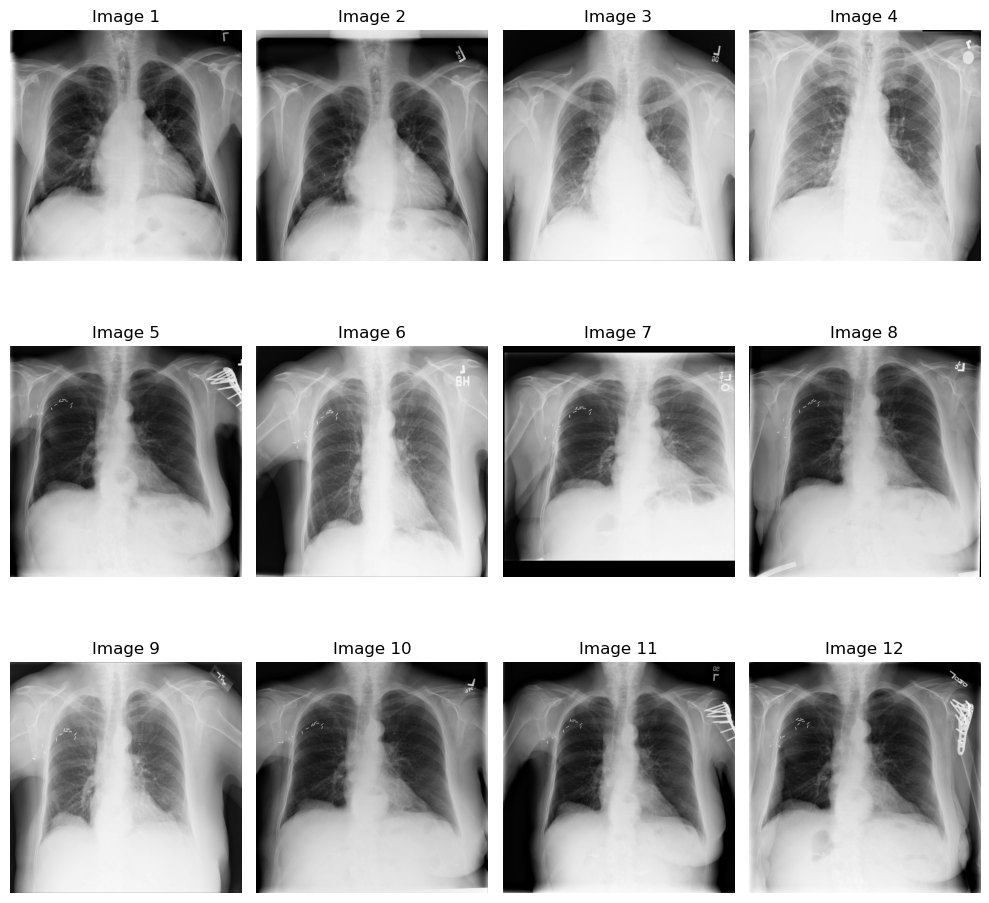

In [16]:
# Liste des fichiers image présents dans le dossier
image_files = [f for f in os.listdir("../data/raw/") if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Limiter le nombre d'images affichées
image_files = image_files[:12]

# Création d’une figure
plt.figure(figsize=(10, 10))

# Boucle d’affichage
for i, file_name in enumerate(image_files):
    img_path = os.path.join(RAW_DATA_DIR, file_name)
    
    try:
        # Charger et convertir en niveaux de gris
        img = Image.open(img_path).convert('L')
        
        # Affichage
        plt.subplot(3, 4, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Image {i+1}")
        plt.axis('off')
    except Exception as e:
        print(f"Erreur avec l'image {file_name}: {e}")

plt.tight_layout()
plt.show()


 Fichier CSV chargé avec succès.
Nombre total d’entrées : 112120

Aperçu des 5 premières lignes :


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


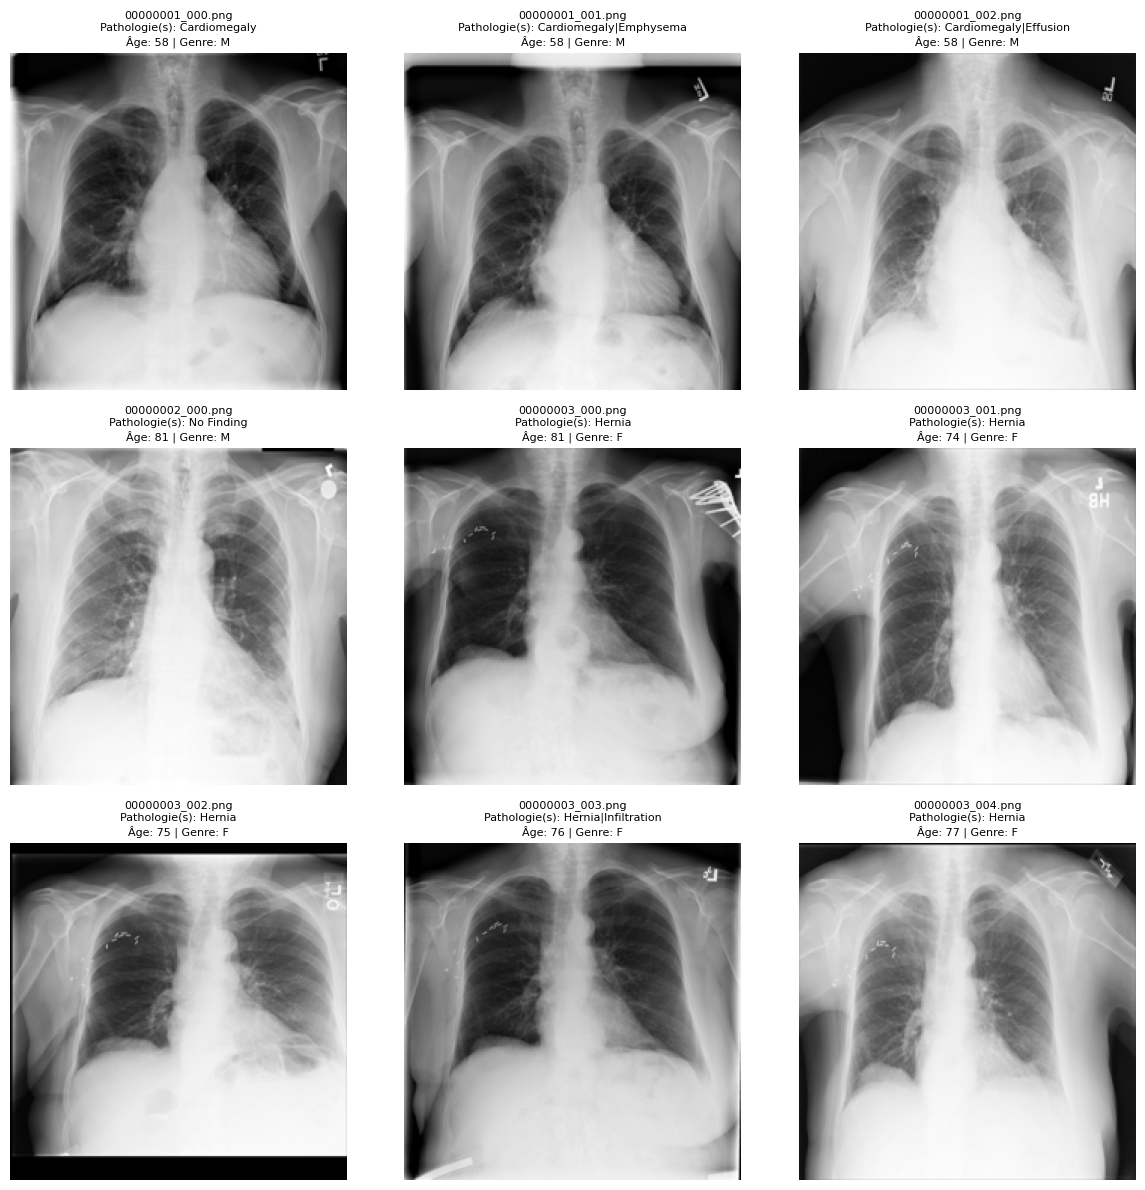


 Fin du prétraitement (Semaine 2 + 3).


: 

In [ ]:
# Lecture du fichier CSV
df = pd.read_csv(CSV_FILE)
print(" Fichier CSV chargé avec succès.")
print("Nombre total d’entrées :", len(df))
print("\nAperçu des 5 premières lignes :")
display(df.head())

# --- Fonction de chargement d'une image ---
def load_image(img_name, size=(224, 224)):
    """
    Charge une image, la convertit en niveaux de gris, la redimensionne et la normalise.
    """
    path = os.path.join(RAW_DATA_DIR, img_name)
    try:
        img = Image.open(path).convert('L')  # niveaux de gris
        img = img.resize(size)               # redimensionnement
        img = np.array(img) / 255.0          # normalisation
        return img
    except Exception as e:
        print(f" Erreur lors du chargement de {img_name}: {e}")
        return None

# Sélection de 9 images d’exemple depuis le dataset
sample_images = df['Image Index'].head(9).tolist()

# Création d'une figure pour afficher les images et leurs métadonnées
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for ax, img_name in zip(axes.flatten(), sample_images):
    img = load_image(img_name)
    if img is not None:
        row = df[df['Image Index'] == img_name].iloc[0]
        description = (
            f"{row['Image Index']}\n"
            f"Pathologie(s): {row['Finding Labels']}\n"
            f"Âge: {row['Patient Age']} | Genre: {row['Patient Gender']}"
        )
        ax.imshow(img, cmap='gray')
        ax.set_title(description, fontsize=8)
    else:
        ax.set_title("Erreur de chargement", fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()

print("\n Fin du prétraitement (Semaine 2 + 3).")

RAW_DATA_DIR utilisé : c:\Users\sdebb\medical-ai-diagnostic-system\data\raw
Nombre d'images trouvées : 14999 (on limite pour test si nécessaire)

 Extraction terminée — aperçu :
                      mean       std       min       max   entropy
00000001_000.png  0.502495  0.263997  0.000000  1.000000  3.820136
00000001_001.png  0.493239  0.255751  0.000000  0.968627  3.816331
00000001_002.png  0.655268  0.267359  0.003922  0.988235  3.635792
00000002_000.png  0.706107  0.187422  0.000000  0.960784  3.456050
00000003_000.png  0.491565  0.283693  0.000000  0.996078  3.818849

 PCA effectuée. Variance expliquée (2 comp.) : 0.7902930044008141


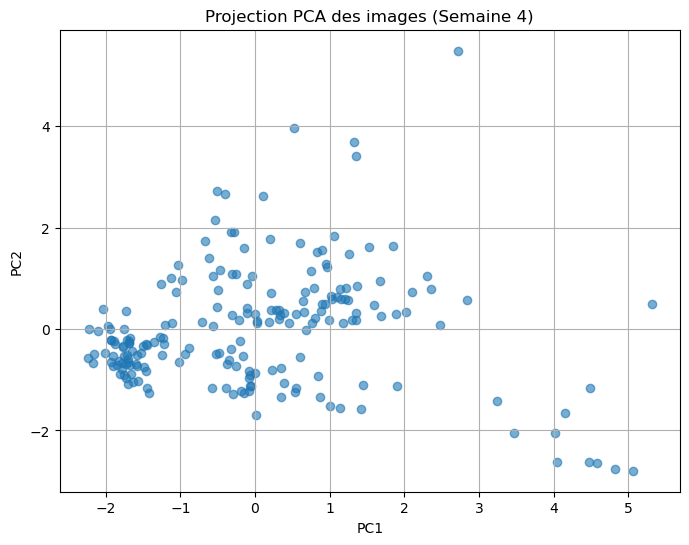


 Features sauvegardées dans : c:\Users\sdebb\medical-ai-diagnostic-system\data\processed\features_week4.csv


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- Chemin vers les images ---
RAW_DATA_DIR = os.path.abspath("../data/raw/")
print("RAW_DATA_DIR utilisé :", RAW_DATA_DIR)



# --- Fonction de chargement d'image ---
def load_image(img_name, size=(224, 224)):
    path = os.path.join(RAW_DATA_DIR, img_name)
    try:
        img = Image.open(path).convert('L')   # niveaux de gris
        img = img.resize(size)
        img = np.array(img) / 255.0
        return img
    except Exception as e:
        print(f"Erreur lors du chargement de {img_name}: {e}")
        return None

# --- Extraction de caractéristiques simples ---
def extract_features(img):
    if img is None:
        return None
    flat = img.flatten()
    hist, _ = np.histogram(flat, bins=50, range=(0, 1), density=True)
    hist = hist / (np.sum(hist) + 1e-12)
    entropy = -np.sum(hist * np.log(hist + 1e-12))
    return [
        float(np.mean(flat)),
        float(np.std(flat)),
        float(np.min(flat)),
        float(np.max(flat)),
        float(entropy)
    ]

def main():
    # --- Liste des fichiers image ---
    if not os.path.isdir(RAW_DATA_DIR):
        print("Erreur : RAW_DATA_DIR introuvable :", RAW_DATA_DIR)
        return

    image_files = [f for f in os.listdir(RAW_DATA_DIR) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    if len(image_files) == 0:
        print("Aucune image trouvée dans :", RAW_DATA_DIR)
        return

    print(f"Nombre d'images trouvées : {len(image_files)} (on limite pour test si nécessaire)")
    image_files = image_files[:200]   # limiter pour tests rapides

    features = []
    valid_files = []
    for f in image_files:
        img = load_image(f)
        feats = extract_features(img)
        if feats is not None:
            features.append(feats)
            valid_files.append(f)

    columns = ['mean', 'std', 'min', 'max', 'entropy']
    df_features = pd.DataFrame(features, columns=columns, index=valid_files)

    print("\n Extraction terminée — aperçu :")
    print(df_features.head())

    # --- Standardisation ---
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_features)

    # --- PCA en 2D ---
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(scaled_features)
    explained = np.sum(pca.explained_variance_ratio_)
    print("\n PCA effectuée. Variance expliquée (2 comp.) :", explained)

    # --- Visualisation ---
    plt.figure(figsize=(8,6))
    plt.scatter(reduced[:,0], reduced[:,1], alpha=0.6)
    plt.title("Projection PCA des images ")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

    # --- Sauvegarde ---
    df_features['PCA1'] = reduced[:,0]
    df_features['PCA2'] = reduced[:,1]
    out_path = os.path.normpath(os.path.join(os.path.dirname(RAW_DATA_DIR), 'processed', 'features_week4.csv'))
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    df_features.to_csv(out_path)
    print("\n Features sauvegardées dans :", out_path)

if __name__ == "__main__":
    main()
